<a href="https://colab.research.google.com/github/pushyag1/NLPClass/blob/master/TVshows.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Use the ‘tvshow.csv’ file.
1. Import required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.tokenize import RegexpTokenizer
import numpy as np
from sklearn import preprocessing
from scipy.sparse import hstack
import pandas_profiling
%matplotlib inline
2. Load the dataset
3. Get the first five rows
4. Show the initial information about the dataset
5. Find the missing values in all columns
6. Drop values with missing % more than 50%
7. Drop Na’s from columns
8. Reset the index
9. Convert into object type
10. Create a function to calculate the movies in different streaming platforms
11. Plot the number of movies on each platform
12. Split the genres by ‘, ‘ and stack it one after the other for easy analysis
13. Assign names to columns
14. Delete column ‘Genres’
15. Join new column with the existing dataframe
16. Count movies according to genre and plot
17. Split the countries by ‘,’ and stack it one after the other for easy analysis
18. Assign name to column
19. Delete column ‘Country’
20. Join new column with the existing dataframe
21. Plot top 10 countries and movie count
22. Perform stacking operation on language column
23. Assign name to column
24. Delete column ‘Language’
25. Join new column with the existing dataframe
26. Plot top 10 languages and movie counts
27. Melt platforms columns to create visualization
DATA 690 Homework Week 13 2
28. Provide the distribution of IMDB rating in different platforms
29. Reload the dataset
30. Melt platform columns to create visualization
31. Plot the total of runtime in different platforms
32. Read the data again
33. Define ndf = df.select_dtypes(include=['float64',"int64"])
34. Import minmax scaler
35. Create minmax scaler object
36. Create dataframe after transformation
37. Assign column names
38. Show initial five records
39. Import cosine similarity
40. Compute the cosine similarity
41. Reverse mapping of indices and movie titles
42. Provide the top five rows of indices
43. Define def give_rec(title, sig=sig):
a. Get the index corresponding to original_title
b. Get the pairwise similarity scores
c. Sort the movies
d. Scores of the 10 most similar movies
e. Index the movies
f. Return the top 10 most similar movies
44. Execute get_rec() function for getting recommendations
45. Get the top 5 rows from df dataframe
46. Define the function def preprocess(df):
a. Combine all text columns’
b. Select all object data types and store them in a list
c. Remove ID and title column
d. Join all text/object columns using commas into a single column
e. Create a tokenizer to remove unwanted elements (symbols, numbers)
f. Convert TfidfVector from the text
g. Select numerical variables
h. Scale numerical variables
i. Apply scaler on the data and convert I into a dataframe
j. Add additional numerical variables into the TF-IDF vector such as IMDb =
ndfmx.IMDb.values[:, None], X_train_dtm = hstack((text_counts, IMDb))
47. Preprocess the data and provide the shape
48. Use cosine similarity
49. Compute the sigmoid kernel as sig2 = cosine_similarity(mat, mat)
50. Reverse mapping of indices and movie titles
51. Provide give_rec("The Matrix",sig=sig2)
That’s it!

In [2]:
# Import required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.tokenize import RegexpTokenizer
import numpy as np
from sklearn import preprocessing
from scipy.sparse import hstack
import pandas_profiling
%matplotlib inline

In [3]:
# Load dataset
df = pd.read_csv("tvshow.csv")
df=df.iloc[:,1:] # removing in unnamed index column

In [4]:
df.head()

,ID,Title,Year,Age,IMDb,Rotten Tomatoes,Netflix,Hulu,Prime Video,Disney+,Type,Directors,Genres,Country,Language,Runtime
0,1,Inception,2010,13+,8.8,87%,1,0,0,0,0,Christopher Nolan,"Action,Adventure,Sci-Fi,Thriller","United States,United Kingdom","English,Japanese,French",148.0
1,2,The Matrix,1999,18+,8.7,87%,1,0,0,0,0,"Lana Wachowski,Lilly Wachowski","Action,Sci-Fi",United States,English,136.0
2,3,Avengers: Infinity War,2018,13+,8.5,84%,1,0,0,0,0,"Anthony Russo,Joe Russo","Action,Adventure,Sci-Fi",United States,English,149.0
3,4,Back to the Future,1985,7+,8.5,96%,1,0,0,0,0,Robert Zemeckis,"Adventure,Comedy,Sci-Fi",United States,English,116.0
4,5,"The Good, the Bad and the Ugly",1966,18+,8.8,97%,1,0,1,0,0,Sergio Leone,Western,"Italy,Spain,West Germany",Italian,161.0


In [6]:
# Show initial information about the dataset
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16744 entries, 0 to 16743
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ID               16744 non-null  int64  
 1   Title            16744 non-null  object 
 2   Year             16744 non-null  int64  
 3   Age              7354 non-null   object 
 4   IMDb             16173 non-null  float64
 5   Rotten Tomatoes  5158 non-null   object 
 6   Netflix          16744 non-null  int64  
 7   Hulu             16744 non-null  int64  
 8   Prime Video      16744 non-null  int64  
 9   Disney+          16744 non-null  int64  
 10  Type             16744 non-null  int64  
 11  Directors        16018 non-null  object 
 12  Genres           16469 non-null  object 
 13  Country          16309 non-null  object 
 14  Language         16145 non-null  object 
 15  Runtime          16152 non-null  float64
dtypes: float64(2), int64(7), object(7)
memory usage: 2.0+ MB


In [7]:
df.Type.unique()

array([0])

In [8]:
#Finding Missing values in all columns
miss = pd.DataFrame(df.isnull().sum())
miss = miss.rename(columns={0:"miss_count"})
miss["miss_%"] = (miss.miss_count/len(df.ID))*100
miss


,miss_count,miss_%
ID,0,0.000000
Title,0,0.000000
Year,0,0.000000
Age,9390,56.079790
IMDb,571,3.410177
Rotten Tomatoes,11586,69.194935
Netflix,0,0.000000
Hulu,0,0.000000
Prime Video,0,0.000000
Disney+,0,0.000000


In [9]:

# Dropping values with missing % more than 50%
df.drop(['Rotten Tomatoes', 'Age'], axis = 1, inplace=True)
# Dropping Na's from the following columns
df.dropna(subset=['IMDb','Directors', 'Genres', 'Country', 'Language', 'Runtime'],inplace=True)
df.reset_index(inplace=True,drop=True)
# Converting into object type
df.Year = df.Year.astype("object")


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15233 entries, 0 to 15232
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   ID           15233 non-null  int64  
 1   Title        15233 non-null  object 
 2   Year         15233 non-null  object 
 3   IMDb         15233 non-null  float64
 4   Netflix      15233 non-null  int64  
 5   Hulu         15233 non-null  int64  
 6   Prime Video  15233 non-null  int64  
 7   Disney+      15233 non-null  int64  
 8   Type         15233 non-null  int64  
 9   Directors    15233 non-null  object 
 10  Genres       15233 non-null  object 
 11  Country      15233 non-null  object 
 12  Language     15233 non-null  object 
 13  Runtime      15233 non-null  float64
dtypes: float64(2), int64(6), object(6)
memory usage: 1.6+ MB


In [12]:
#A function to calculate the movies in different Streaming platforms
def m_cnt(plat, count=False):
  if count==False:
    print('Platform {} Count: {}'. format(plat, df[plat].sum()))
  else:
    return df[plat].sum()

In [14]:
# Let's see count of movies/shows of each streaming platform
m_cnt('Netflix')
m_cnt('Hulu')
m_cnt('Prime Video')
m_cnt('Disney+')

Platform Netflix Count: 3152
Platform Hulu Count: 848
Platform Prime Video Count: 11289
Platform Disney+ Count: 542


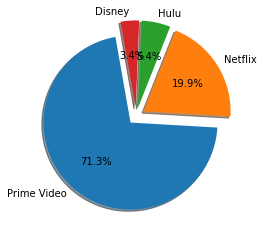

In [16]:
# Movies on each platform
lab = 'Prime Video','Netflix', 'Hulu', 'Disney'
s = [m_cnt('Prime Video', count=True),
m_cnt('Netflix', count=True),
m_cnt('Hulu', count=True),
m_cnt('Disney+', count=True)]
explode = (0.1, 0.1, 0.1, 0.1)
#plotting
fig1, ax1 = plt.subplots()
ax1.pie(s,
labels = lab,autopct = '%1.1f%%',explode = explode,shadow = True,startangle = 100)
ax1.axis = ('equal')
plt.show()

In [17]:
##split the genres by ',' & then stack it one after the other for easy analysis.
g = df['Genres'].str.split(',').apply(pd.Series, 1).stack()
g.index = g.index.droplevel(-1)
# Assign name to column
g.name = 'Genres'
# delete column
del df['Genres']
# join new column with the existing dataframe
df_genres = df.join(g)

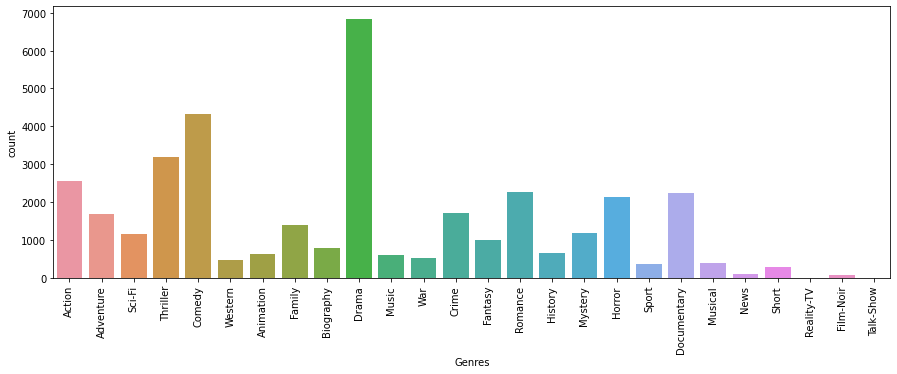

In [18]:
# Count of movies according to genre
plt.figure(figsize=(15,5))
sns.countplot(x='Genres', data=df_genres)
plt.xticks(rotation=90)
plt.show()
#

In [19]:
# Split the Country by ',' & then stack it one after the other for easy analysis.
c = df['Country'].str.split(',').apply(pd.Series, 1).stack()
c.index = c.index.droplevel(-1)
# Assign name to column
c.name = 'Country'
# delete column
del df['Country']
# join new column with the existing dataframe
df_country = df.join(c)
#

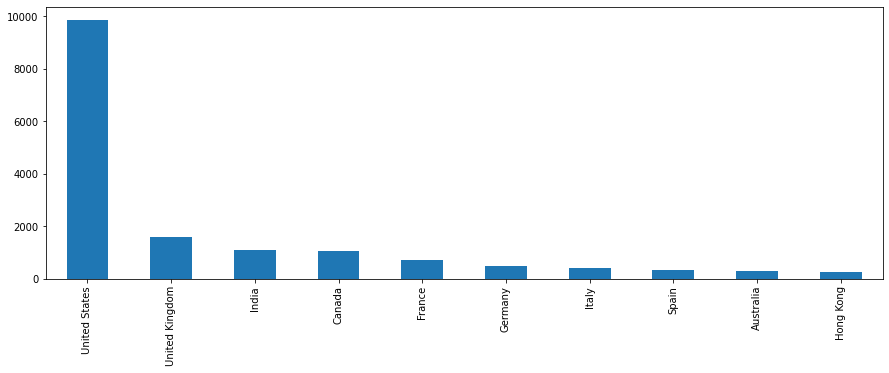

In [20]:
# plotting top 10 country and movie count
df_country['Country'].value_counts()[:10].plot(kind='bar',figsize=(15,5))
plt.show()
#

In [21]:
# perform stacking operation on language column
l = df['Language'].str.split(',').apply(pd.Series,1).stack()
l.index = l.index.droplevel(-1)
# Assign name to column
l.name = 'Language'
# delete column
del df['Language']
# join new column with the existing dataframe
df_language = df.join(l)
#

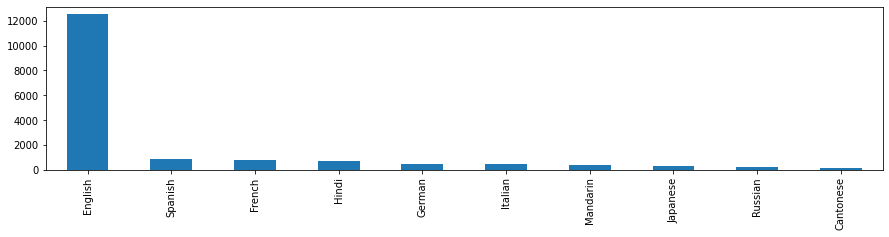

In [22]:
# plotting top 10 Language and movie count
df_language['Language'].value_counts()[:10].plot(kind='bar',figsize=(15,3))
plt.show()

In [23]:
# melting platform columns to create visualization
df2 = pd.melt(df, id_vars=["ID","Title","Year","IMDb","Type","Runtime"], var_name="platform")
df2 = df2[df2.value==1]
df2.drop(columns=["value"],axis=1,inplace=True)

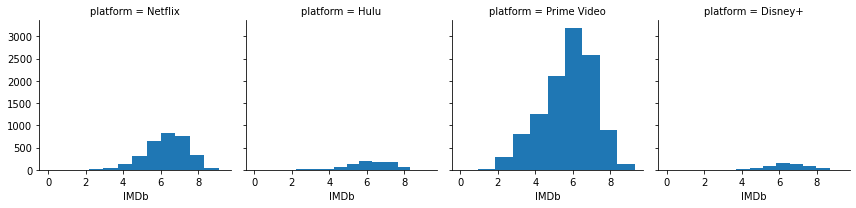

In [24]:
# Distribution of IMDB rating in different platform
g = sns.FacetGrid(df2, col = "platform")
g.map(plt.hist, "IMDb")
plt.show()

In [25]:
# Load dataset
df = pd.read_csv("tvshow.csv")
df=df.iloc[:,1:]
df.ID = df.ID.astype("object")
# melting platform columns to create visualization
df2 = pd.melt(df, id_vars=["ID","Title","Year","Age","IMDb","Rotten Tomatoes","Type","Runtime"], var_name="platform")
df2 = df2[df2.value==1]
df2.drop(columns=["value"],axis=1,inplace=True)
#

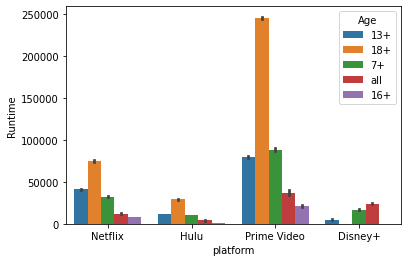

In [26]:
# Total of runtime in different platform
ax = sns.barplot(x="platform", y="Runtime",hue="Age", estimator=sum, data=df2)

In [31]:
# Reading Data Again
df = pd.read_csv("/content/tvshow.csv")
df=df.iloc[:,1:]

In [32]:
#Finding Missing values in all columns
miss = pd.DataFrame(df.isnull().sum())
miss = miss.rename(columns={0:"miss_count"})
miss["miss_%"] = (miss.miss_count/len(df.ID))*100
miss

,miss_count,miss_%
ID,0,0.000000
Title,0,0.000000
Year,0,0.000000
Age,9390,56.079790
IMDb,571,3.410177
Rotten Tomatoes,11586,69.194935
Netflix,0,0.000000
Hulu,0,0.000000
Prime Video,0,0.000000
Disney+,0,0.000000


In [36]:
#Dropping values with missing % more than 50%
df.drop(['Rotten Tomatoes', 'Age'], axis = 1, inplace=True)
# Dropping Na's from the following columns
df.dropna(subset=['IMDb','Directors', 'Genres', 'Country', 'Language', 'Runtime'],inplace=True)
df.reset_index(inplace=True,drop=True)
# converting into object type
df.ID = df.ID.astype("object")
df.Year = df.Year.astype("object")

In [37]:
ndf = df.select_dtypes(include=['float64',"int64"])

In [38]:
#importing minmax scaler
from sklearn import preprocessing
# Create MinMaxScaler Object
scaler = preprocessing.MinMaxScaler(feature_range=(0, 1))
# Create dataframe after transformation
ndfmx = pd.DataFrame((scaler.fit_transform(ndf)))
# assign column names
ndfmx.columns=ndf.columns
# Show initial 5 records
ndfmx.head()

,IMDb,Netflix,Hulu,Prime Video,Disney+,Type,Runtime
0,0.946237,1.0,0.0,0.0,0.0,0.0,0.449541
1,0.935484,1.0,0.0,0.0,0.0,0.0,0.412844
2,0.913978,1.0,0.0,0.0,0.0,0.0,0.452599
3,0.913978,1.0,0.0,0.0,0.0,0.0,0.351682
4,0.946237,1.0,0.0,1.0,0.0,0.0,0.489297


In [39]:
# Import cosine similarity
from sklearn.metrics.pairwise import cosine_similarity
# Compute the cosine similarity
sig = cosine_similarity(ndfmx, ndfmx)
# Reverse mapping of indices and movie titles
indices = pd.Series(df.index, index=df['Title']).drop_duplicates()
#

In [40]:
indices.head()

Title
Inception                         0
The Matrix                        1
Avengers: Infinity War            2
Back to the Future                3
The Good, the Bad and the Ugly    4
dtype: int64

In [41]:
def give_rec(title, sig=sig):
    # Get the index corresponding to original_title
    idx = indices[title]
    # Get the pairwise similarity scores
    sig_scores = list(enumerate(sig[idx]))
    # Sort the movies
    sig_scores = sorted(sig_scores, key=lambda x: x[1], reverse=True)
    # Scores of the 10 most similar movies
    sig_scores = sig_scores[1:11]
    # Movie indices
    movie_indices = [i[0] for i in sig_scores]
    # Top 10 most similar movies
    return df['Title'].iloc[movie_indices]

In [42]:
df.head()

,ID,Title,Year,IMDb,Netflix,Hulu,Prime Video,Disney+,Type,Directors,Genres,Country,Language,Runtime
0,1,Inception,2010,8.8,1,0,0,0,0,Christopher Nolan,"Action,Adventure,Sci-Fi,Thriller","United States,United Kingdom","English,Japanese,French",148.0
1,2,The Matrix,1999,8.7,1,0,0,0,0,"Lana Wachowski,Lilly Wachowski","Action,Sci-Fi",United States,English,136.0
2,3,Avengers: Infinity War,2018,8.5,1,0,0,0,0,"Anthony Russo,Joe Russo","Action,Adventure,Sci-Fi",United States,English,149.0
3,4,Back to the Future,1985,8.5,1,0,0,0,0,Robert Zemeckis,"Adventure,Comedy,Sci-Fi",United States,English,116.0
4,5,"The Good, the Bad and the Ugly",1966,8.8,1,0,1,0,0,Sergio Leone,Western,"Italy,Spain,West Germany",Italian,161.0


In [43]:
#the function performs all the important preprocessing steps
def preprocess(df):
    #combining all text columns
    # Selecting all object data type and storing them in list
    s = list(df.select_dtypes(include=['object']).columns)
    # Removing ID and Title column
    s.remove("Title")
    s.remove("ID")
    # Joining all text/object columns using commas into a single column
    df['all_text']= df[s].apply(lambda x: ','.join(x.dropna().astype(str)),axis=1)
    # Creating a tokenizer to remove unwanted elements from our data like symbols and numbers
    token = RegexpTokenizer(r'[a-zA-Z]+')
    # Converting TfidfVector from the text
    cv = TfidfVectorizer(lowercase=True,stop_words='english',ngram_range = (1,1),tokenizer = token.tokenize)
    text_counts= cv.fit_transform(df['all_text'])
    # Aelecting numerical variables
    ndf = df.select_dtypes(include=['float64',"int64"])
    # Scaling Numerical variables
    scaler = preprocessing.MinMaxScaler(feature_range=(0, 1))
    # Applying scaler on our data and converting i into a data frame
    ndfmx = pd.DataFrame((scaler.fit_transform(ndf)))
    ndfmx.columns=ndf.columns    
    # Adding our adding numerical variables in the TF-IDF vector
    IMDb = ndfmx.IMDb.values[:, None]
    X_train_dtm = hstack((text_counts, IMDb))
    Netflix = ndfmx.Netflix.values[:, None]
    X_train_dtm = hstack((X_train_dtm, Netflix))
    Hulu = ndfmx.Hulu.values[:, None]
    X_train_dtm = hstack((X_train_dtm, Hulu))
    Prime = ndfmx["Prime Video"].values[:, None]
    X_train_dtm = hstack((X_train_dtm, Prime))
    Disney = ndfmx["Disney+"].values[:, None]
    X_train_dtm = hstack((X_train_dtm, Disney))
    Runtime = ndfmx.Runtime.values[:, None]
    X_train_dtm = hstack((X_train_dtm, Runtime))
    return X_train_dtm


In [44]:
# Preprocessing data
mat =preprocess(df)
mat.shape

(15233, 11997)

In [45]:
# using cosine similarity
from sklearn.metrics.pairwise import cosine_similarity
# Compute the sigmoid kernel
sig2 = cosine_similarity(mat, mat)
# Reverse mapping of indices and movie titles
indices = pd.Series(df.index, index=df['Title']).drop_duplicates()

In [46]:
give_rec("The Matrix",sig=sig2)

81             The Matrix Reloaded
245         The Matrix Revolutions
755              Jupiter Ascending
154                 Miss Americana
0                        Inception
3               Back to the Future
1971    The Girl Allergic to Wi-Fi
36                 Minority Report
2           Avengers: Infinity War
132        Solo: A Star Wars Story
Name: Title, dtype: object